# BIKE SHARING CASE STUDY (MULTIPLE LINEAR REGRESSION)

### Problem Statement

BoomBikes, a leading bike-sharing service in the US, has experienced significant revenue declines due to the ongoing COVID-19 pandemic. To address this challenge and prepare for a surge in demand post-pandemic, BoomBikes seeks to develop a comprehensive understanding of the factors influencing bike demand.

The company aims to identify the key variables that significantly impact the demand for shared bikes and determine the extent to which these variables can predict future demand. This knowledge will enable BoomBikes to optimize their operations, improve customer satisfaction, and gain a competitive advantage in the market.

- **Identify key variables that significantly impact the demand for shared bikes.**
- **Determine how well these variables can predict future demand.**


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Reading and Understanding the Data

In [3]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Unique Values to identify variable type
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking the missing values across the dataset.
bike.isnull().mean()*100 #tells us about the percentage of missing values in different columns

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
#checking the duplicate values across the dataset.
bike.duplicated().sum()

0

### Inferences
1. **No Null Values**: There are no null values and no duplicate values in the dataset.
2. **Data Types**: By checking unique values in the dataset and reading the data dictionary, we can identify:
   - **7 columns** are of **object datatype (categorical variables)**:
   - **8 columns** are of **numerical datatype (numerical variables)**.
   - **1 column** is of **datetime datatype**.
3. **Info Insight**: Although 15 out of 16 columns are of int/float type data, which seems like numerical datatype, the unique count provides a clear picture of the dataset along with the data dictionary. We need to identify and convert these columns into categorical variables.
4. **Categorical Variables**:
   - `yr`
   - `holiday`
   - `workingday`
   - `weathersit`
   - `season`
   - `weekday`
   - `mnth`
    We will create dummy variables for a few of these categorical variables during the cleaning stage.
5. **Numerical Variables**:
   - `temp`
   - `hum`
   - `casual`
   - `windspeed`
   - `registered`
   - `atemp`
   - `cnt`
   - `instant`
#### As specified in the problem statement, the `cnt` column is the target variable, which aggregates the `casual` and `registered` columns. Therefore, both `casual` and `registered` can be dropped from the dataset.
- The `instant` column does not influence the `cnt` value, so it can be safely removed.
- The `dteday` column doesn't offer additional insights into the `cnt` since the dataset already includes year, month, and week columns, which provide better information. Therefore, the `dteday` column can also be removed.



### Data Cleaning and Visualisation

In [10]:
#Dropping some unnecessary columns from the dataset.
bike = bike.drop(columns = ['instant','dteday', 'casual','registered'])


In [11]:
bike.shape

(730, 12)

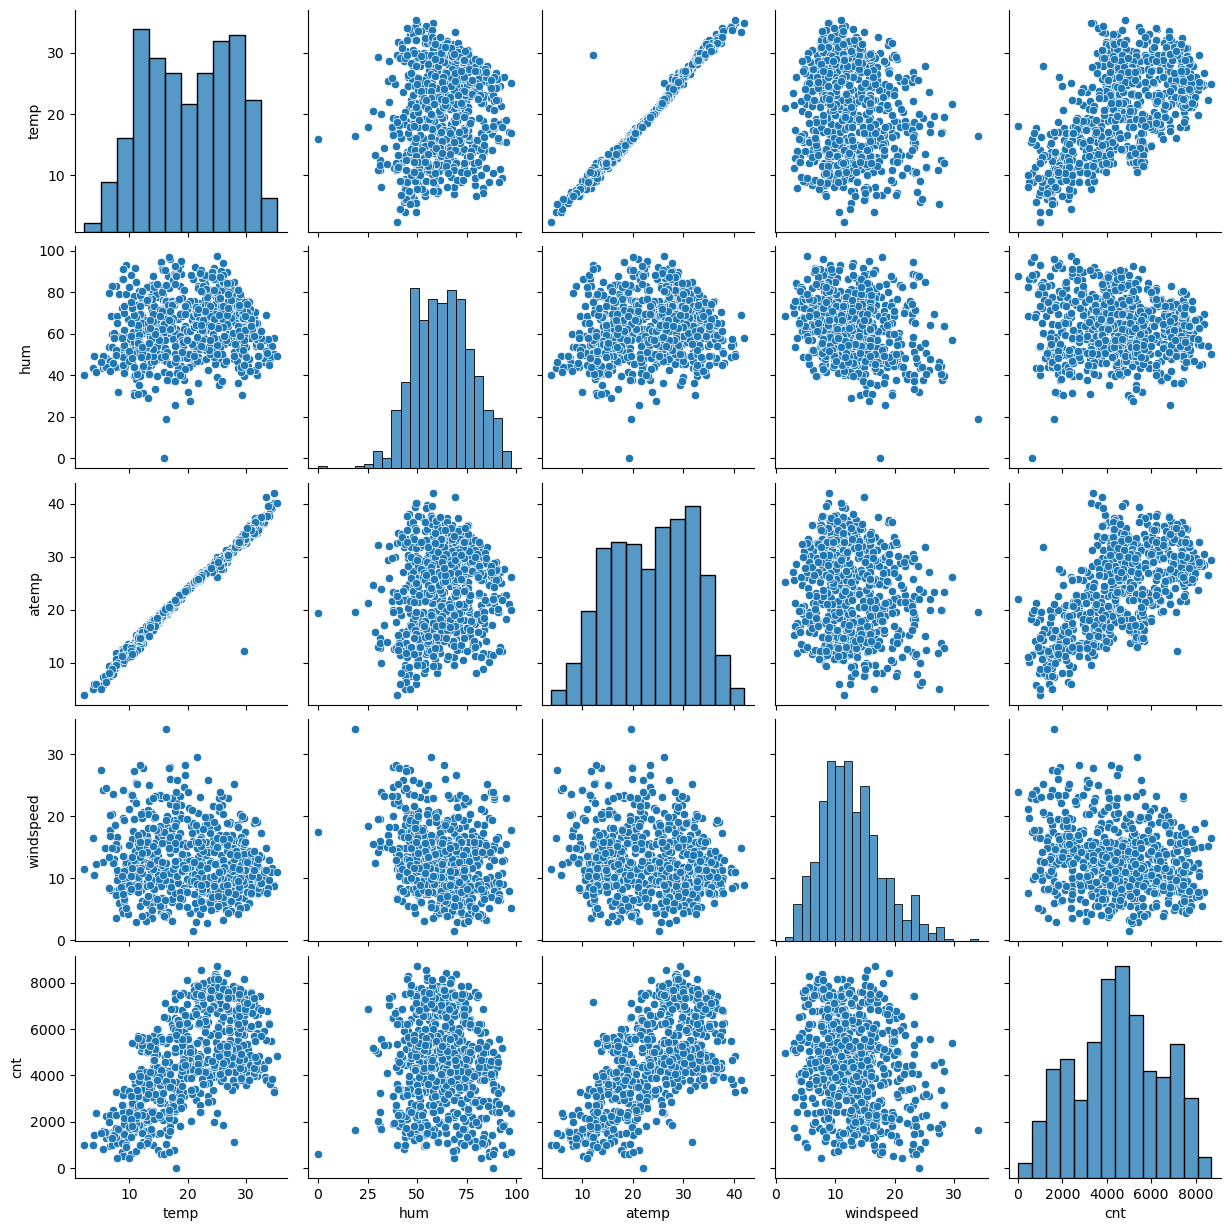

In [12]:
#Visualising Numerical Variables using Pairplot
sns.pairplot(bike, vars=['temp','hum','atemp','windspeed','cnt'])
plt.show()

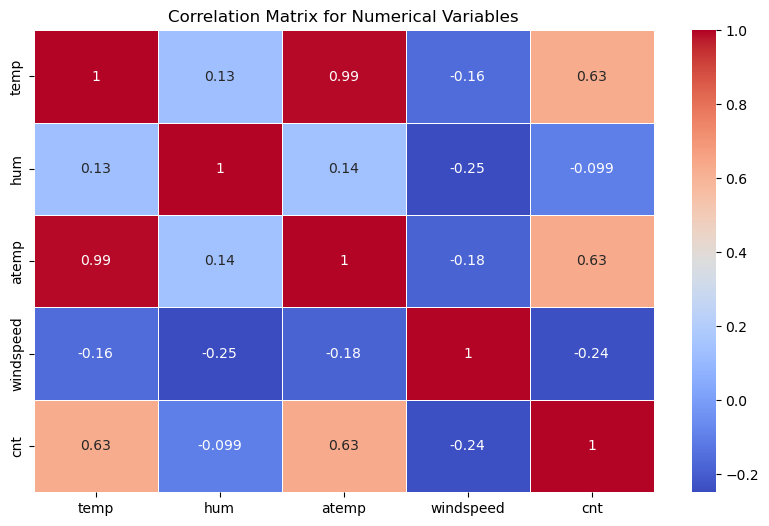

In [13]:
#Checking the correlation between different variables of numerical datatype
num_vars = ['temp', 'hum', 'atemp', 'windspeed', 'cnt']

# Calculate the correlation matrix for the selected variables
correlation_matrix = bike[num_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


- It's evident that the `temp` and `atemp` variables exhibit a strong correlation, indicating multicollinearity. This can adversely affect the performance of a regression model. Consequently, we should drop one of the two variables. We will drop the `atemp` variable.



In [14]:
bike = bike.drop(columns=['atemp'])
bike.shape

(730, 11)

#### Outliers Analysis

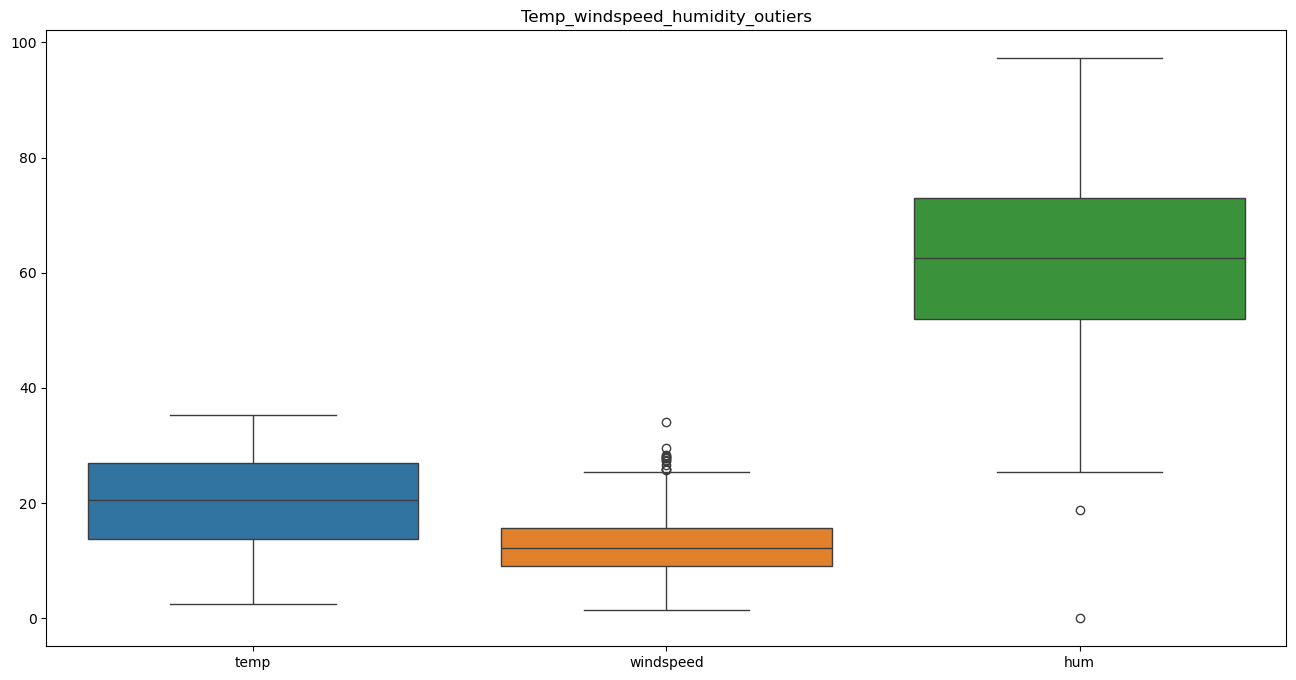

In [15]:
fig,ax=plt.subplots(figsize=(16,8))
#Box plot for Temp_windspeed_humidity_outliers
ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=bike[['temp','windspeed','hum']])

plt.show()

- Both `windspeed` and `hum` variables contain outliers.


In [16]:
#outlier treatment
def iqr_outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    outliers = ((df[column] < lower_limit) | (df[column] > upper_limit)).sum()
    outlier_percentage = (outliers / len(df[column])) * 100
    return round(outlier_percentage, 2)


Before Removing Outliers: temp


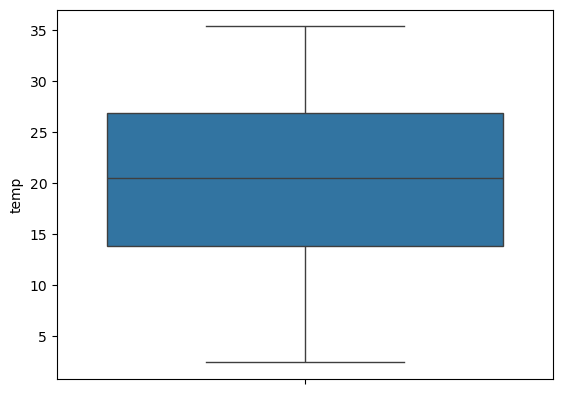

Outliers count for temp -> 0.0%
Before Removing Outliers: hum


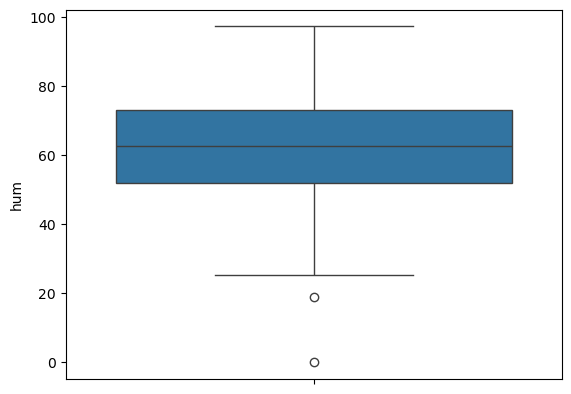

Outliers count for hum -> 0.27%
Before Removing Outliers: windspeed


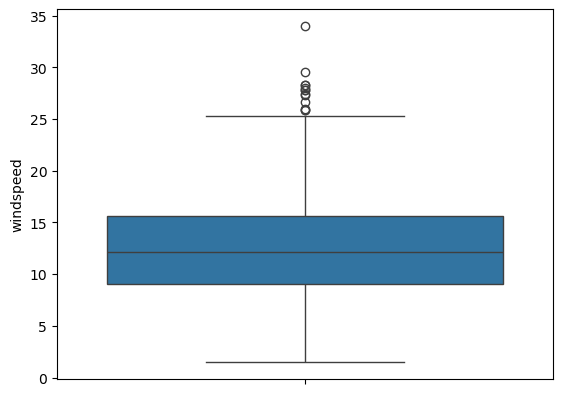

Outliers count for windspeed -> 1.78%


In [17]:
list_to_remove_outliers = ['temp', 'hum', 'windspeed']

for column in list_to_remove_outliers:
    print(f"Before Removing Outliers: {column}")
    sns.boxplot(bike[column]).set(ylabel=column)
    plt.show()
    print(f"Outliers count for {column} -> {iqr_outlier_percentage(bike, column)}%")



In [18]:
# Mapping some variables into categorical variables

# Map the season column according to string values corresponding to the values in the dataset
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Map the weekday column according to string values corresponding to the values in the dataset
bike['weekday'] = bike['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Map the mnth column values with numbers (1 to 12) to month names
bike['mnth'] = bike['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

# Map the weathersit column to string values corresponding to the values in the dataset
bike['weathersit'] = bike['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})


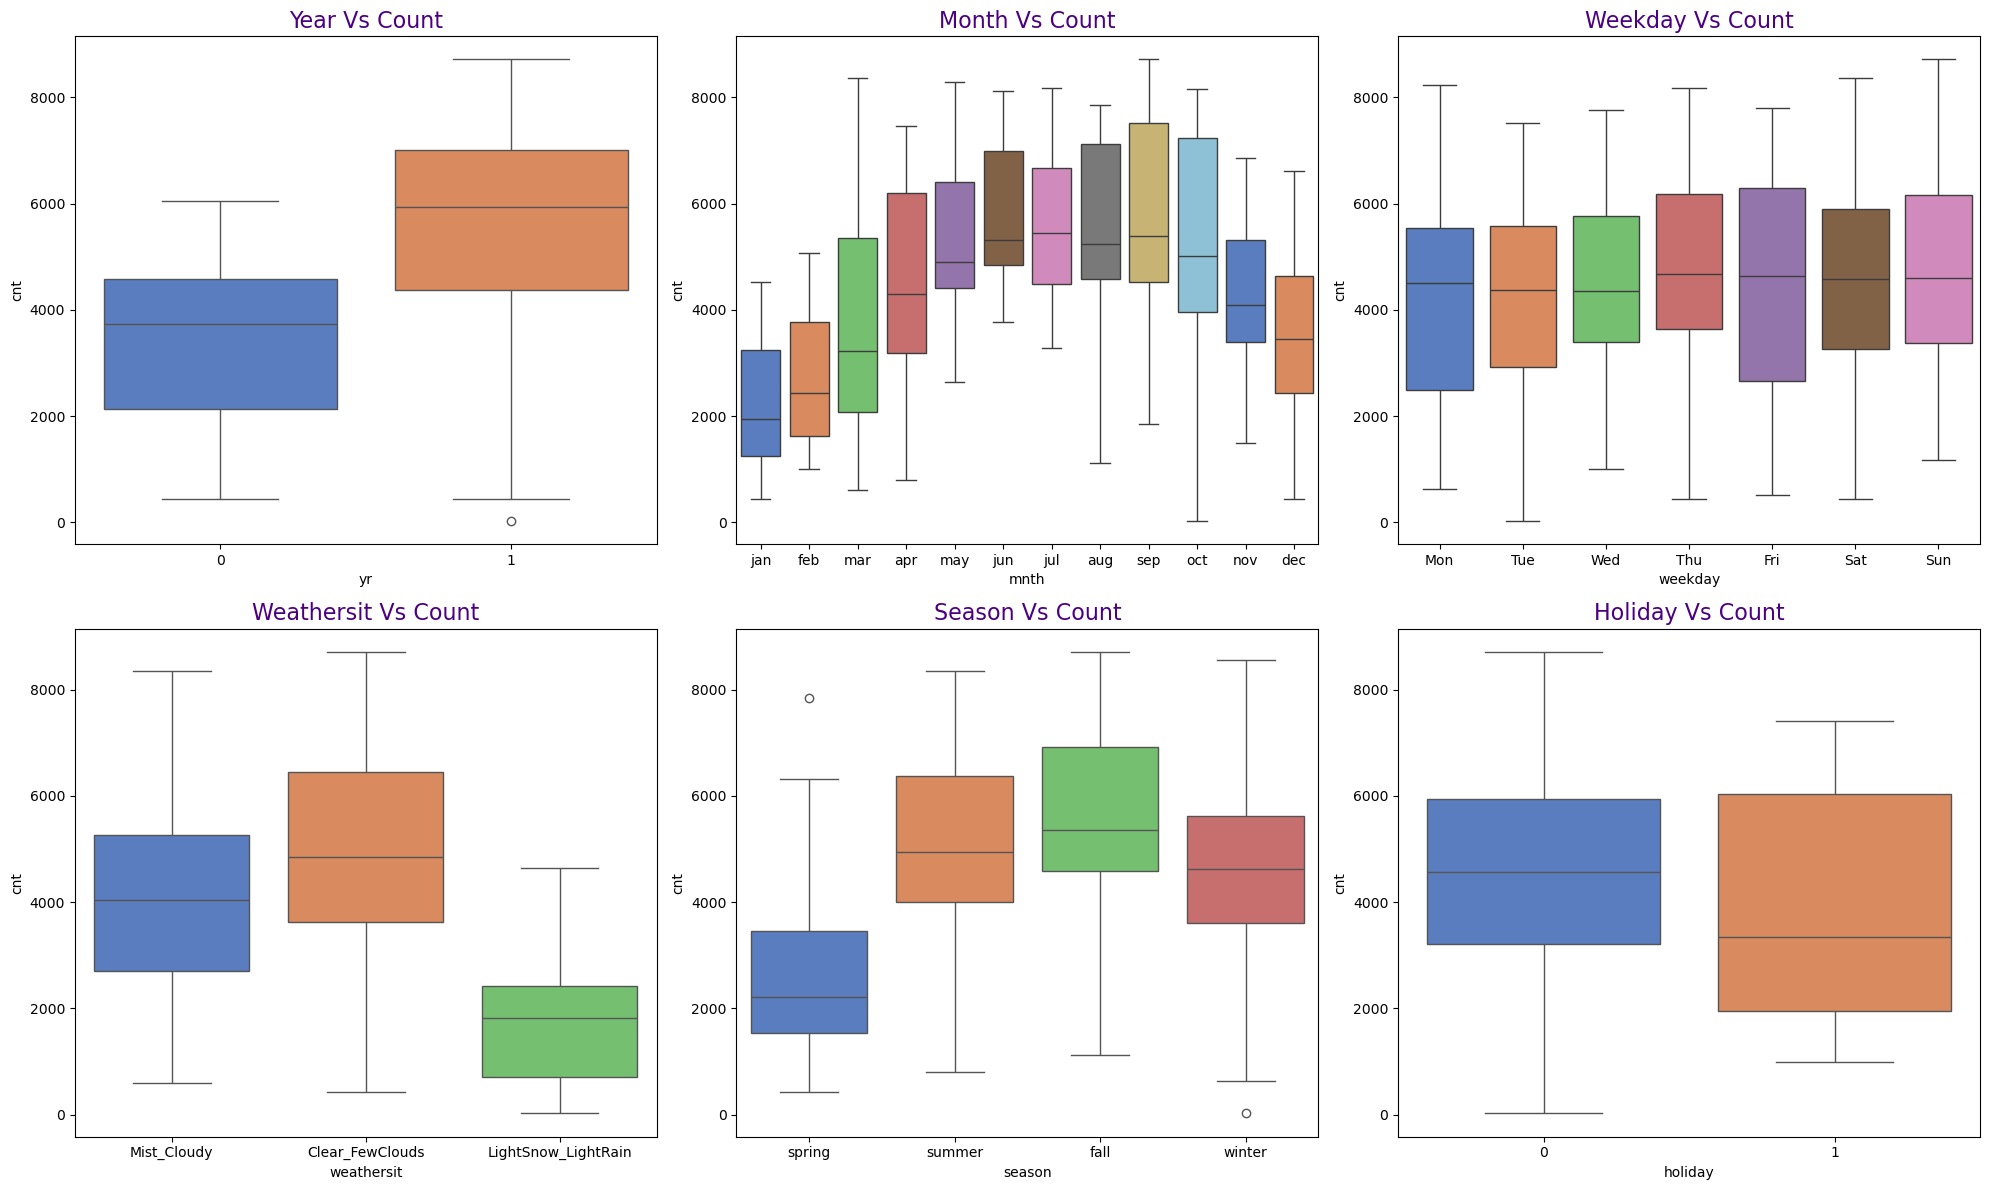

In [19]:
#Visualising Categorical Variable using boxplot
custom_palette = sns.color_palette("muted")
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='yr', y='cnt', data=bike, palette=custom_palette)
plt.title("Year Vs Count", fontsize=16, color="indigo")

plt.subplot(2, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=bike, palette=custom_palette)
plt.title("Month Vs Count", fontsize=16, color="indigo")

plt.subplot(2, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=bike, palette=custom_palette)
plt.title("Weekday Vs Count", fontsize=16, color="indigo")

plt.subplot(2, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike, palette=custom_palette)
plt.title("Weathersit Vs Count", fontsize=16, color="indigo")

plt.subplot(2, 3, 5)
sns.boxplot(x='season', y='cnt', data=bike, palette=custom_palette)
plt.title("Season Vs Count", fontsize=16, color="indigo")

plt.subplot(2, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=bike, palette=custom_palette)
plt.title("Holiday Vs Count", fontsize=16, color="indigo")

plt.tight_layout()
plt.show()

### Inferences
1. **Increase in Customers**: The count of customers has increased significantly in 2019 compared to 2018.

2. **Seasonal Trends**: The count of customers is relatively higher in the mid-year months, primarily in the summer and fall seasons.

3. **Weekly Distribution**: The count of bookings is spread similarly across all seven days of the week.

4. **Weather Impact**: 
   - If the weather is clear, the count of bookings is relatively higher.
   - The count decreases in misty weather.
   - The bookings fall significantly in rainy weather.


In [20]:
# Creating Dummy Variables
dummyvariables = pd.get_dummies(bike[['season', 'weekday', 'mnth', 'weathersit']], dtype=int, drop_first=True)

# Concatenate the Dummy variables to the DataFrame
bike = pd.concat([bike, dummyvariables], axis=1)

# Dropping the original season, weekday, mnth, weathersit variables
bike.drop(['season', 'weekday', 'mnth', 'weathersit'], axis=1, inplace=True)

bike.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets


In [21]:
# Import necessary librararies
from sklearn.model_selection import train_test_split

# Import minmax scaler
from sklearn.preprocessing import MinMaxScaler

#Import required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Import the statsmodels library
import statsmodels.api as sm  

# Import statsmodels library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [22]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


### Rescaling the Variables

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
numv = ['hum', 'temp', 'windspeed', 'cnt']

bike_train[numv] = scaler.fit_transform(bike_train[numv])


In [24]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


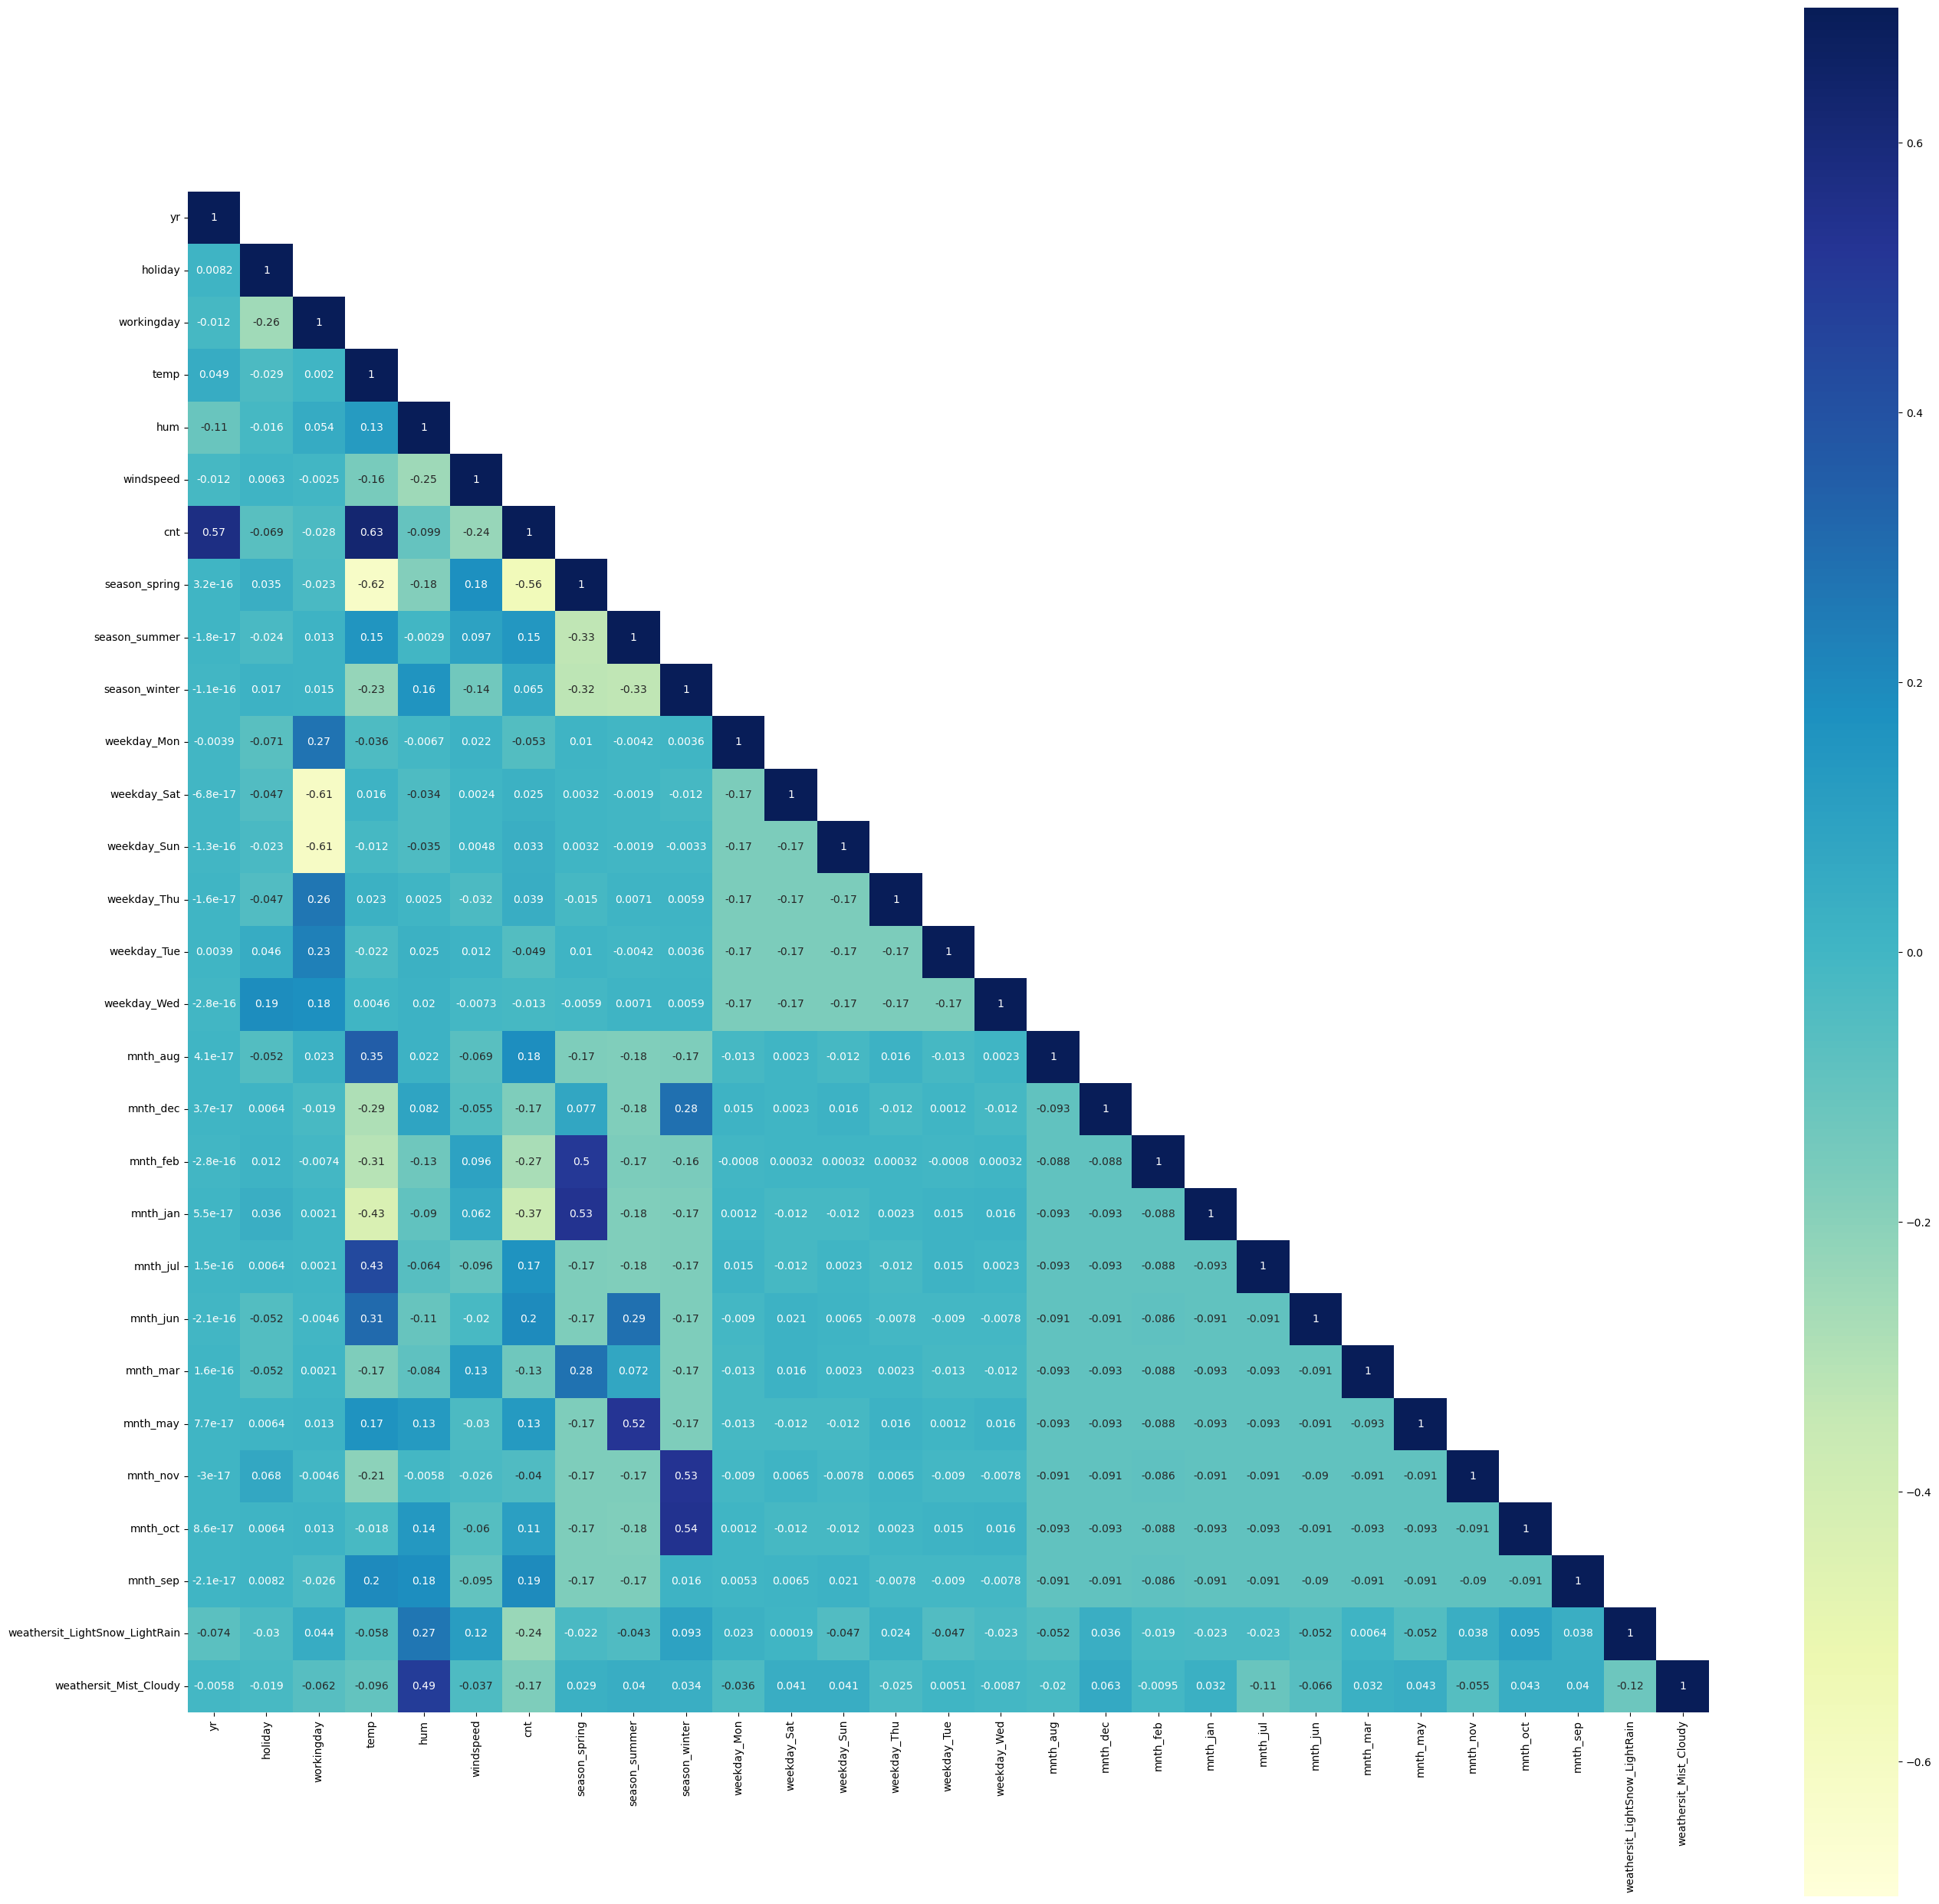

In [26]:
#plotting the heatmap to identify the correlation
plt.figure(figsize=(32,32))


mask = np.array(bike.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bike.corr(), mask=mask, vmax=.7,vmin=-.7, square=True, annot=True, cmap = "YlGnBu");

In [27]:
# Since the target variable is 'cnt', we are dropping 'cnt' in y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)



In [29]:
# Check the details of rfe to understand which features should be choosen in top 20 predicter variable
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 5),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 9),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [30]:
# view the column choosed by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Sat',
       'weekday_Sun', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [31]:
#Create a dataframe with RFE choosen columns
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,1,0,0,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,0,0,0,0,0,0,1


### First Model

In [32]:
#Build the first linear model
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                             0.393481
yr                                0.230957
holiday                          -0.134705
workingday                       -0.056967
temp                              0.451665
hum                              -0.159135
windspeed                        -0.186871
season_spring                    -0.056828
season_summer                     0.027020
season_winter                     0.099869
weekday_Sat                      -0.040698
weekday_Sun                      -0.034459
mnth_dec                         -0.049754
mnth_feb                         -0.037284
mnth_jan                         -0.064873
mnth_jul                         -0.054453
mnth_may                          0.024826
mnth_nov                         -0.045419
mnth_sep                          0.072528
weathersit_LightSnow_LightRain   -0.249797
weathersit_Mist_Cloudy           -0.058757
dtype: float64

In [33]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          9.48e-186
Time:                        18:32:33   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [34]:
#Calculating Variance Inflation Factors (VIF) for Selected Features

# Assuming X_train_rfe is your training data after RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)


                          Features    VIF
2                       workingday  48.84
4                              hum  38.65
3                             temp  29.21
10                     weekday_Sun   9.80
9                      weekday_Sat   9.41
6                    season_spring   7.09
5                        windspeed   5.47
8                    season_winter   4.92
7                    season_summer   4.30
13                        mnth_jan   2.55
19          weathersit_Mist_Cloudy   2.41
1                          holiday   2.38
0                               yr   2.11
16                        mnth_nov   2.00
12                        mnth_feb   1.98
11                        mnth_dec   1.77
15                        mnth_may   1.63
14                        mnth_jul   1.61
17                        mnth_sep   1.44
18  weathersit_LightSnow_LightRain   1.31


### Second Model

In [35]:
# Dropping highly correlated variables and insignificant variables

X = X_train_rfe.drop('weekday_Sun', axis=1)


In [36]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()


In [37]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          8.77e-187
Time:                        18:32:33   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [38]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.83
3,temp,19.21
2,workingday,6.00
6,season_spring,5.59
5,windspeed,4.87
8,season_winter,4.14
7,season_summer,3.42
12,mnth_jan,2.39
18,weathersit_Mist_Cloudy,2.38
0,yr,2.10


### Third Model

In [39]:
X = X.drop('weekday_Sat', axis=1)


In [40]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          7.76e-188
Time:                        18:32:33   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
     

,Features,VIF
4,hum,32.51
3,temp,18.55
6,season_spring,5.48
5,windspeed,4.86
8,season_winter,4.10
2,workingday,3.70
7,season_summer,3.37
11,mnth_jan,2.38
17,weathersit_Mist_Cloudy,2.37
0,yr,2.10


#### Fourth Model

In [43]:
X = X.drop('mnth_may', axis=1)

In [44]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.60e-188
Time:                        18:32:33   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [46]:

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.48
3,temp,18.49
6,season_spring,5.48
5,windspeed,4.76
8,season_winter,4.10
2,workingday,3.70
7,season_summer,2.84
11,mnth_jan,2.38
16,weathersit_Mist_Cloudy,2.37
0,yr,2.09


#### Fifth Model

In [47]:
X = X.drop('mnth_feb', axis=1)

In [48]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          4.55e-189
Time:                        18:32:33   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [50]:

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.92
3,temp,17.92
5,windspeed,4.75
6,season_spring,4.42
8,season_winter,4.10
2,workingday,3.69
7,season_summer,2.83
15,weathersit_Mist_Cloudy,2.37
0,yr,2.09
12,mnth_nov,1.84


#### Sixth Model

In [51]:
X = X.drop('hum', axis=1)

In [52]:
# Build the sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [53]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.13e-186
Time:                        18:32:33   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [54]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.11
4,windspeed,4.68
2,workingday,3.58
5,season_spring,3.08
7,season_winter,3.07
6,season_summer,2.31
0,yr,2.07
11,mnth_nov,1.81
9,mnth_jan,1.66
10,mnth_jul,1.59


In [55]:
# Assign final model to lm_final
lm_final = lr_6

# List down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')

# Display the final list of variables and their coefficients
print("Final list of variables and their coefficients:")
print(round(lm_final.params, 3))


Final list of variables and their coefficients:
const                             0.265
yr                                0.234
holiday                          -0.109
workingday                       -0.023
temp                              0.436
windspeed                        -0.159
season_spring                    -0.072
season_summer                     0.034
season_winter                     0.090
mnth_dec                         -0.046
mnth_jan                         -0.050
mnth_jul                         -0.051
mnth_nov                         -0.041
mnth_sep                          0.068
weathersit_LightSnow_LightRain   -0.294
weathersit_Mist_Cloudy           -0.083
dtype: float64


## Machine Learning Model Insight

From the summary and the VIF dataframe, we can see that all the variables retained in the model are now significant. 

- The **VIF value of `temp` is 6.11**, which is acceptable considering temperaturean importantwpredictorctor in deciding to book a bike or not.
- The **p-values of all variables are below 0.05**, a threshold assumed for this project.

These insights indicate that the model is statistically sound and the selected variables are reliable predictors.


## Residual Analysis
Residual Analysis of the Train Data

To verify that the error terms follow a normal distribution (a key assumption in linear regression), let's plot a histogram of the error terms and examine its shape.


In [56]:
#preparing the train set 
y_train_pred_cnt = lr_6.predict(X_train_lm)

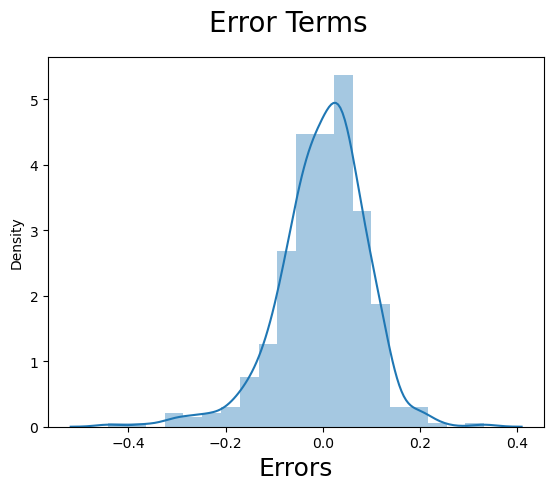

In [57]:
# Calculate the residuals
residual = y_train - y_train_pred_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()


Text(0, 0.5, 'y_trsain_pred')

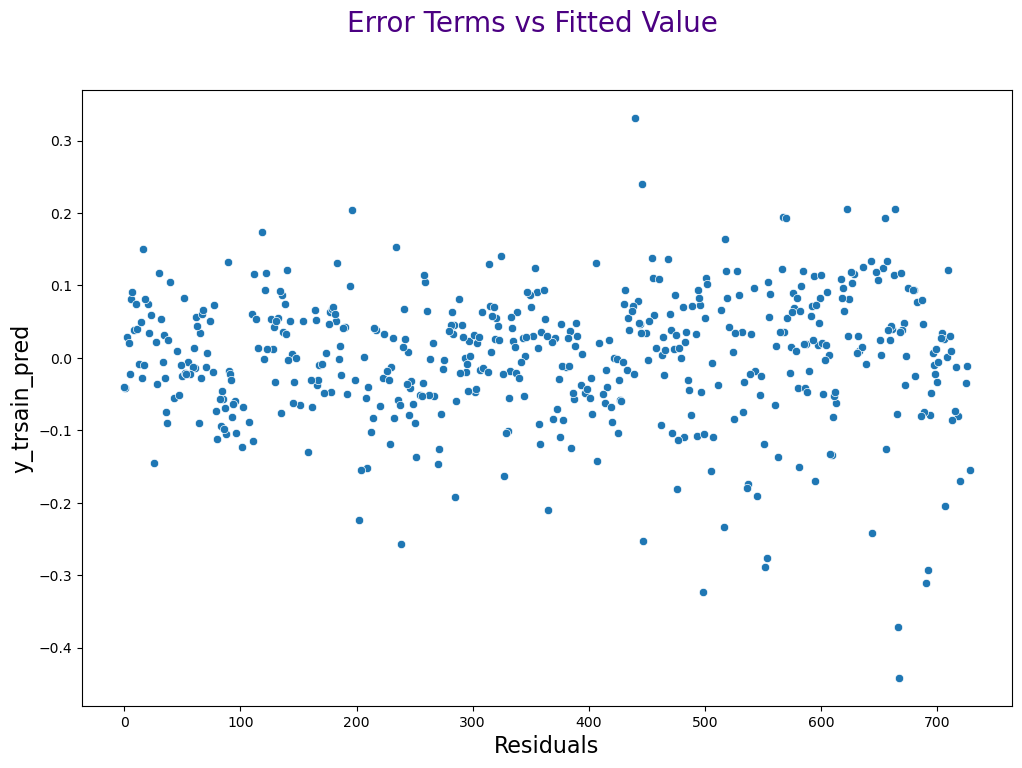

In [58]:
# Lets us check if the error terms are independant

fig = plt.figure(figsize=(12, 8))

sns.scatterplot(data = residual)

fig.suptitle('Error Terms vs Fitted Value', fontsize=20,color= "indigo")
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('y_trsain_pred', fontsize=16)


### Residual Analysis Inferences
- The distribution of error terms follows a normal distribution.
- The error terms are centered around a mean of zero.
- The error terms are independent of each other.


## Model Evaluation

In [59]:
#Performing the scaling operation test data numerical values
numericalval = ['hum','temp','windspeed','cnt']

bike_test[numv] = scaler.transform(bike_test[numericalval])

In [60]:
##popping count in y_test 
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              219 non-null    int64  
 1   holiday                         219 non-null    int64  
 2   workingday                      219 non-null    int64  
 3   temp                            219 non-null    float64
 4   hum                             219 non-null    float64
 5   windspeed                       219 non-null    float64
 6   season_spring                   219 non-null    int32  
 7   season_summer                   219 non-null    int32  
 8   season_winter                   219 non-null    int32  
 9   weekday_Mon                     219 non-null    int32  
 10  weekday_Sat                     219 non-null    int32  
 11  weekday_Sun                     219 non-null    int32  
 12  weekday_Thu                     219 non-

In [61]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [62]:
X_train.columns[~rfe.support_]

Index(['weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'mnth_aug',
       'mnth_jun', 'mnth_mar', 'mnth_oct'],
      dtype='object')

In [63]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6


X_test_m6 = X_test_m6.drop(['weekday_Mon', 'weekday_Thu', 'weekday_Wed', 'mnth_aug', 'mnth_jun','mnth_mar', 'mnth_may', 'mnth_oct',"weekday_Sun","weekday_Sat","mnth_feb","weekday_Tue","hum"], axis = 1)
     

In [64]:
# Making predictions using the model

y_pred_m6 = lr_6.predict(X_test_m6)

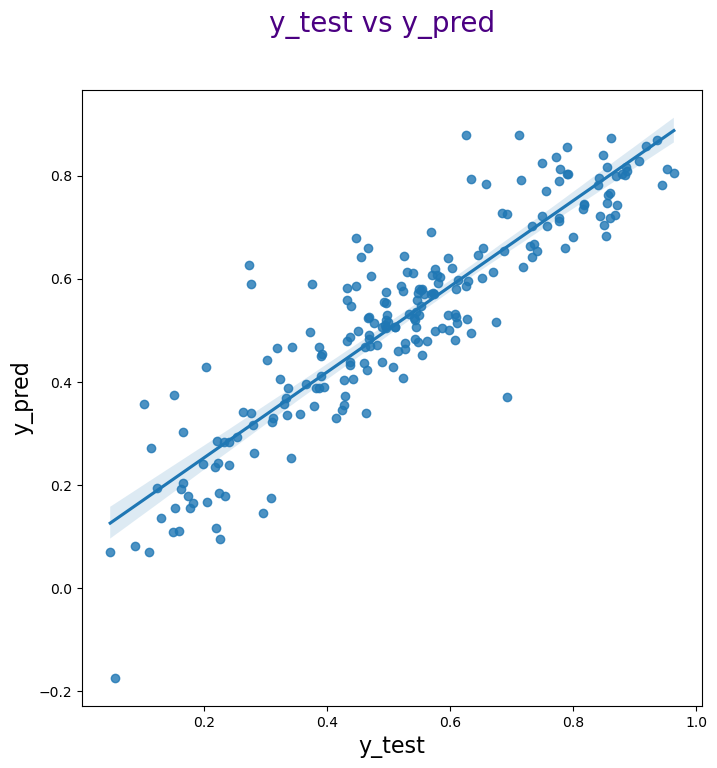

In [65]:

# Plotting y_test vs. y_pred to understand the spread

fig = plt.figure(figsize=(8, 8))

sns.regplot(x=y_test, y=y_pred_m6)

fig.suptitle('y_test vs y_pred', fontsize=20, color="indigo")
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()


The positive linear relationship between `y_test` and `y_pred` suggests that the final model will effectively predict business outcomes.


## R2 Score

In [66]:
from sklearn.metrics import r2_score
#evaluate
r2=r2_score(y_test,y_pred = y_pred_m6)
r2
     

0.8160235878128289

In [67]:
#Taking Adjusted R2 score
# n is number of rows in X

n = X_test.shape[0]


# Number of features i.e predictors and  p 
p = X_test.shape[1]

# We  will now find the Adjusted R-squared using the below formula

adjustedr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjustedr2

0.7889112744378775

In [68]:
##printing final list of variables with their coefficients
print(round(lm_final.params,3))

const                             0.265
yr                                0.234
holiday                          -0.109
workingday                       -0.023
temp                              0.436
windspeed                        -0.159
season_spring                    -0.072
season_summer                     0.034
season_winter                     0.090
mnth_dec                         -0.046
mnth_jan                         -0.050
mnth_jul                         -0.051
mnth_nov                         -0.041
mnth_sep                          0.068
weathersit_LightSnow_LightRain   -0.294
weathersit_Mist_Cloudy           -0.083
dtype: float64


### Key Insights and Recommendations:

- **Temperature Dependency**: The user count is greatly influenced by Temperature or Apparent Temperature.
- **Year-over-Year Growth**: There has been a notable increase in the number of bike users compared to the previous year, indicating potential for growth in the upcoming years.
- **Seasonal Adjustments**: To address the impact of weather and seasons, it's essential for the business to refine its strategy during the start and end of the year when performance tends to be lower.
- **Holiday vs. Workday Performance**: Business activity is relatively higher on holidays than on working days. To improve performance on working days, consider constructing docks near office premises.
- **Weather Impact**: Windspeed and light rain adversely affect the business. Addressing these factors can lead to improvements.
- **Model Performance**: The R2 scores for training and test data are 81.6, respectively, which are quite good.

Overall, the model indicates positive business growth in the coming years. However, external factors like the aftereffects of the pandemic and the entry of low-budget vehicles may influence future performance.
